In [1]:
#!pip install xlrd
import xlrd #reading in excel files
import pprint as pp
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#!pip install seaborn
import seaborn as sns
#!pip install sklearn
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [23]:
df = pd.read_csv('file:///Users/meihao/Desktop/predictive%20SAS/Final%20Project%20/project_cleaned_data.csv')

In [24]:
df.head()

,Unnamed: 0,S1,S2,S3,hS3,Q1ra,Q1rb,Q1rd,Q1re,Q1rf,...,D7r5,D7r6,D7r7,D7r6oe,D8,D9,D10ra,D10rb,D11,qtime
0,0,Myself,Female,52,50-54,Agree Some what,Agree Some what,Strongly Agree,Agree Some what,Agree Some what,...,NO TO: American Indian,NO TO: Other ( please specify),NO TO: Decline to answer,,"Not currently employed, but looking for work",115,5,2,Illinois,657.14
1,1,Myself,Male,39,35-39,Agree Some what,Agree Some what,Agree Some what,Disagree Some what,Agree Some what,...,NO TO: American Indian,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,275,6,2,Pennsylvania,885.05
2,2,Myself,Female,30,30-34,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree Some what,...,NO TO: American Indian,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,150,6,0,Illinois,777.58
3,3,Myself,Female,21,18-24,Agree Some what,Agree Some what,Strongly Agree,Agree Some what,Agree Some what,...,NO TO: American Indian,NO TO: Other ( please specify),NO TO: Decline to answer,,Work full time,150,5,8,Wisconsin,654.48
4,4,Myself,Male,43,40-44,Agree Some what,Agree Some what,Agree Some what,Agree Some what,Agree Some what,...,NO TO: American Indian,NO TO: Other ( please specify),NO TO: Decline to answer,,Not currently employed,213,5,7,New York,437.95


In [25]:
df.drop([ 'Unnamed: 0'], axis=1,inplace=True)

In [26]:
df.shape

(1003, 383)

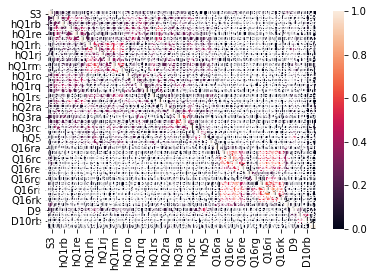

In [15]:
sns.heatmap(df.corr().abs(),annot=True)

#### Demographic 

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
| Demographic   |s1    |resposibility|	yes	|-		|cat    |	Yes	|string|0/1|
|             	|s2    |Gender	     |yes	|-	    |cat    |	Yes	|string|0/1|
|            	|s3    |Age	         |-	|Yes    |num	|	Yes	|string|int|
|           	|hs3   |Age group    |-    |Yes		|cat	|   Not yet	|-|-|
|            	|D2     |number of household members| - | yes |cat|yes |string|int|
|           	|D3     |married or living          | yes | -   |cat|Yes|string|0/1|
|            	|D4     |#children residing with you| - | yes  |cat|Yes|string|int|
|            	|D5     |Education level            | - | yes   |cat|yes |cat|get dummies|
|            	|D6     |Income range before tax    |- | yes |cat|yes |cat|get dummies|
|            	|D7 r1-r7|Ethnicity options         | Yes | -   |cat|Yes|yes|transform into one column|
|            	|D7 r6oe|Ethnicity options-other    | -| Yes   |cat|Yes|yes|transform into one column|
|            	|D8     |work situation             | - | Yes   |cat|yes |cat|get dummies|
| 	            |D11    |States                     | -| Yes  |cat|yes |cat|get dummies|

Transformations

In [27]:
print("S1:",df.S1.unique())
print("S2",df.S2.unique())
print("S3",df.S3.unique())
print("D2",df.D2.unique())
print("D3",df.D3.unique())
print("D4",df.D4.unique())

S1: ['Myself' 'I share the responsibility with someone else']
S2 ['Female' 'Male']
S3 [52 39 30 21 43 26 54 36 20 29 37 62 32 18 65 61 48 59 25 47 45 28 40 31
 53 51 57 42 34 24 46 23 27 44 60 64 55 33 56 22 58 41 19 35 50 38 63 49]
D2 [ 4  2  3  5  1  6  8 12  7  9]
D3 ['Yes, married or living with partner'
 'No, not married and not living with partner' ' ']
D4 ['2' '1' ' ' '3' '4' '5' '11' '7' '6']


In [28]:
S1 = {"S1" : {'Myself':0, 'I share the responsibility with someone else':1}}
df.replace(S1, inplace=True)


In [29]:
S2 = {"S2" : {'Male':0, 'Female':1}}
df.replace(S2, inplace=True)

In [30]:
df['S3'] = df['S3'].astype(int)

In [31]:
df.D3.replace(r' ', np.NaN, inplace= True)

In [32]:
df.D4.replace(r' ', np.NaN, inplace= True)

In [33]:
df['D4'].fillna(df['D4'].mode()[0], inplace=True)

In [14]:
df.D2.unique()

array([ 4,  2,  3,  5,  1,  6,  8, 12,  7,  9], dtype=int64)

In [34]:
df['S3'] = df['S3'].astype(int)

In [35]:
df['D4'] = df['D4'].astype(int)

In [36]:
df['D2'] = df['D2'].astype(int)

In [37]:
df['D3'].fillna(df['D3'].mode()[0], inplace=True)

In [38]:
D3 = {"D3" : {'No, not married and not living with partner':0, 'Yes, married or living with partner':1}}
df.replace(D3, inplace=True)

In [39]:
df.D5.unique()

array(['Trade or technical school', 'Some college or Associate degree',
       "Attended graduate school or received Advanced degree (Master's, Ph.D.)",
       "Graduated college/Bachelor's degree", 'Graduated high school',
       'Some high school or less', 'Decline to answer'], dtype=object)

In [40]:
df['D5'] = [1 if x in ['Trade or technical school', 'Some college or Associate degree',"Attended graduate school or received Advanced degree (Master's, Ph.D.)",
       "Graduated college/Bachelor's degree"] else 0 for x in df['D5']]

In [41]:
df.groupby("D6").size()

D6
$100,000 but less than $200,000    104
$15,000 but less than $25,000      151
$200,000 but less than $300,000     14
$25,000 but less than $35,000      133
$300,000 but less than $500,000      7
$35,000 but less than $50,000      139
$50,000 but less than $75,000      186
$500,000 or over                     2
$75,000 but less than $100,000     106
Decline to answer                   46
Less than $15,000                  115
dtype: int64

In [42]:
df.columns.get_loc('D6')

368

In [43]:
for i in range(0,1003):
        if df.iloc[i,368]=='$500,000 or over':
            df.iloc[i,368]= 500000
        elif df.iloc[i,368]=='$35,000 but less than $50,000':
            df.iloc[i,368]= 42500
        elif df.iloc[i,368]=='$300,000 but less than $500,000':
            df.iloc[i,368]= 400000
        elif df.iloc[i,368]=='$25,000 but less than $35,000':
            df.iloc[i,368]= 30000
        elif df.iloc[i,368]=='$75,000 but less than $100,000':
            df.iloc[i,368]= 87500
        elif df.iloc[i,368]=='$50,000 but less than $75,000':
            df.iloc[i,368]= 62500
        elif df.iloc[i,368]=='$100,000 but less than $200,000':
            df.iloc[i,368]= 150000
        elif df.iloc[i,368]=='$15,000 but less than $25,000':
            df.iloc[i,368]= 20000
        elif df.iloc[i,368]=='Decline to answer':
            df.iloc[i,368]= 62500
        elif df.iloc[i,368]=='$200,000 but less than $300,000':
            df.iloc[i,368]= 250000
        else:
            df.iloc[i,368]=15000

In [44]:
print(df.D7r1.unique())
print(df.D7r2.unique())
print(df.D7r3.unique())
print(df.D7r4.unique())
print(df.D7r5.unique())
print(df.D7r6.unique())
print(df.D7r7.unique())
print(df.D7r6oe.unique())

['White /Anglo/Caucasian' 'NO TO: White /Anglo/Caucasian']
['NO TO: Hispanic' 'Hispanic']
['NO TO: Black/African American' 'Black/African American']
['NO TO: Asian/Oriental' 'Asian/Oriental']
['NO TO: American Indian' 'American Indian']
['NO TO: Other ( please specify)' 'Other ( please specify)']
['NO TO: Decline to answer' 'Decline to answer']
[' ' 'South Asian' 'middle eastern' 'caribbean' 'Mixed Race' 'Hawaiian'
 'italian' 'pacific isalnder']


In [45]:
def f(df):
    if df['D7r1'] == 'White /Anglo/Caucasian':
        val = 1
    elif df['D7r2'] =='Hispanic':
        val = 2
    elif df['D7r3'] =='Black/African American':
        val = 3
    elif df['D7r4'] =='Asian/Oriental':
        val = 4
    elif df['D7r5'] =='American Indian':
        val = 5
    elif df['D7r7'] =='Decline to answer':
        val = 0
    else:
        val = 6
    return val

In [46]:
 df['D7'] = df.apply(f, axis=1)

In [47]:
df.D7.isnull().sum()

0

In [49]:
s=df.groupby('D7').size()
bar_D7=s.to_frame()
bar_D7.reset_index(inplace=True)
bar_D7.rename(columns = {0:'value'}, inplace = True)
bar_D7_1=bar_D7.sort_values('value', ascending=False)

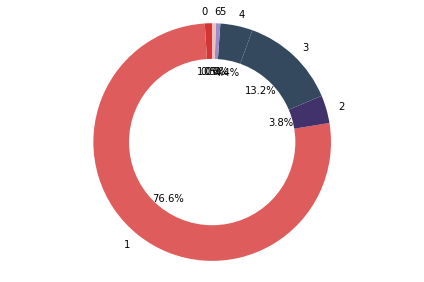

In [50]:
# DONUT chart
labels = bar_D7['D7']
sizes = bar_D7['value']
#,'#42326B',"#34495e",'#9D8DC7', "#F1BDBD"
colors = ['#D63333','#DE5C5C','#42326B','#34495e',"#34495e",'#9D8DC7', "#F1BDBD"]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [51]:
demographic_columns=['S1','S2', 'S3', 'hS3','D2','D3','D4','D5','D6','D8', 'D11','D7']
df_dem=df.loc[:, demographic_columns]

In [52]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 12 columns):
S1     1003 non-null int64
S2     1003 non-null int64
S3     1003 non-null int64
hS3    1003 non-null object
D2     1003 non-null int64
D3     1003 non-null int64
D4     1003 non-null int64
D5     1003 non-null int64
D6     1003 non-null int64
D8     1003 non-null object
D11    1003 non-null object
D7     1003 non-null int64
dtypes: int64(9), object(3)
memory usage: 94.1+ KB


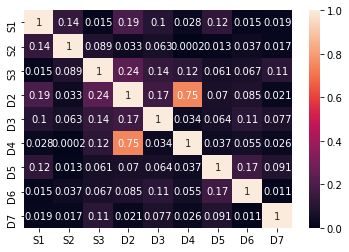

In [53]:
sns.heatmap(df_dem.corr().abs(),annot=True)

#### Physical health 

|Section |	Question |	Description|values.count |options.count| type|Missing|Missing%|
|-------|-----------|--------------- |----------|-------|------|-------|-------|
|            	|D9     |weight pound               |194| -   |num|No |-|
| 	            |D10ra  |height ft                  | 5 | -   |num|No |-|
| 	            |D10rb  |height inch                | 13| -   |num|No |-|

In [34]:
PHH_columns=['D9','D10ra', 'D10rb']
df_PHH=df.loc[:, PHH_columns]

We will calculate BMI as a measure of physical health.

In [54]:
#BMI = (Weight in Pounds / (Height in inches) x (Height in inches)	) x 703
df['BMI']=(df['D9']/(12*df["D10ra"]+df["D10rb"])**2)*703

In [55]:
df.BMI.nunique

<bound method IndexOpsMixin.nunique of 0       21.031478
1       35.304054
2       20.341435
3       22.804931
4       33.356872
5       24.199951
6       19.366391
7       22.462722
8       44.280675
9       17.250892
10      34.967561
11      24.325260
12      20.117066
13      31.868248
14      28.885135
15      30.406574
16      32.573847
17      28.339156
18      24.088687
19      23.401056
20      32.074985
21      34.538927
22      41.499410
23      19.663387
24      25.744629
25      27.121914
26      26.132992
27      24.962706
28      26.383937
29      25.603538
          ...    
973     30.663453
974     20.918469
975     25.839831
976     25.744629
977     36.914514
978     23.490755
979     20.085714
980     23.774714
981     35.945946
982     21.787190
983     25.101869
984     31.563265
985     36.487889
986     16.390044
987     22.237755
988     25.675676
989     78.819602
990     25.072368
991     26.831081
992     28.243243
993     24.102857
994     28.582180
995    

In [56]:
def g(df):
    if (df['BMI'] <= 18.5):
        val = 0 #underweight
    elif (df['BMI'] > 18.5 and df['BMI'] <= 24.9):
        val = 1 #Normal
    elif (df['BMI'] > 25.0 and df['BMI']<= 29.9):
        val = 2 #overweight
    else:
        val = 3 #obese
    return val

In [57]:
df["BMI_group"]=df.apply(g, axis=1)

In [58]:
df["BMI_group"]

0       1
1       3
2       1
3       1
4       3
5       1
6       1
7       1
8       3
9       0
10      3
11      1
12      1
13      3
14      2
15      3
16      3
17      2
18      1
19      1
20      3
21      3
22      3
23      1
24      2
25      2
26      2
27      3
28      2
29      2
       ..
973     3
974     1
975     2
976     2
977     3
978     1
979     1
980     1
981     3
982     1
983     2
984     3
985     3
986     0
987     1
988     2
989     3
990     2
991     2
992     2
993     1
994     2
995     1
996     1
997     3
998     1
999     2
1000    3
1001    1
1002    3
Name: BMI_group, Length: 1003, dtype: int64

In [59]:
s=df.groupby('BMI_group').size()
bar_BMI=s.to_frame()
bar_BMI.reset_index(inplace=True)
bar_BMI.rename(columns = {0:'value'}, inplace = True)
#bar_D7_1=bar_D7.sort_values('value', ascending=False)

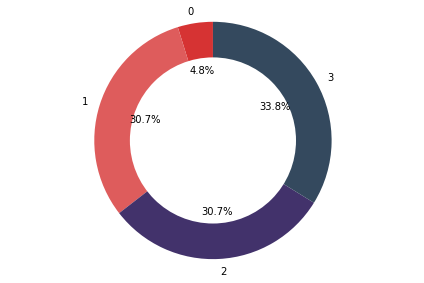

In [60]:
# DONUT chart
labels = bar_BMI['BMI_group']
sizes = bar_BMI['value']
#,'#42326B',"#34495e",'#9D8DC7', "#F1BDBD"
colors = ['#D63333','#DE5C5C','#42326B','#34495e',"#34495e",'#9D8DC7', "#F1BDBD"]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

- 0:underwieght
- 1:normal
- 2:overweight
- 3:obese

#### Current mental state

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
|Q1             |ra-rt |Attitude     |4	    |4		|cat	|  No	|-||
|               |hra-hrt|Attitude    |4     |4		|points   |No	|-|
|               |       |            |      |       |         |     | |
|Q2           	|ra-rb |ideal	     |2     |2		|cat-blank|don't use  | |
|           	|hra-hrb|            |2	    |2		|points	  |No   |-|
|               |       |            |      |       |         |     | |
|Q3	            |ra-rc	|everyday mood|2	|2		|cat-blank|don't use | |
|             	|hra-hrc|             |2	|2		|points	  |No	|-|
|               |       |            |      |       |         |     | |
|Q4	            |       |weight goal  |5	|5		|cat	  |-   |-|
|               |hQ4    |weight goal  |5    |5      |points   |No   |-|
|Q5          	|       |weightgoalnumeric|	5 |	5	|cat      |-  |-|	
|               |hQ5    |weightgaolnumeric| 5 | 5   |points   |No  |-|
|Q6	            |       |Exercise freq.	  | 6 |	6	|cat	  |-   |-|
|               |hQ6    |Exercise freq.	  | 6 | 6   |points   |No   |-|
|               |       |            |      |       |         |     | |
|POINTS         |       |Test point       |75 | -   |num      |Yes  |number|groups|
|qtime 	        |       |interview time             |997| -   |num|No |-|-|

For the attitude questions 1,2,3 will use the survey's point system.

In [42]:
df.columns.get_loc("hQ4") #21
#df.columns.get_loc("hQ1rt") #37

49

In [43]:
attitude_columns=['hQ1ra','hQ1rb','hQ1rd','hQ1re','hQ1rf', 'hQ1rh', 'hQ1ri', 'hQ1rj','hQ1rk', 'hQ1rm', 'hQ1rn', 'hQ1ro', 'hQ1rp', 'hQ1rq'
 , 'hQ1rr', 'hQ1rs','hQ1rt','hQ2ra','hQ2rb','hQ3ra','hQ3rb','hQ3rc','hQ4','hQ5','hQ6']

In [44]:
df_attitude=df.loc[:, attitude_columns]

In [45]:
df_attitude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 25 columns):
hQ1ra    1003 non-null int64
hQ1rb    1003 non-null int64
hQ1rd    1003 non-null int64
hQ1re    1003 non-null int64
hQ1rf    1003 non-null int64
hQ1rh    1003 non-null int64
hQ1ri    1003 non-null int64
hQ1rj    1003 non-null int64
hQ1rk    1003 non-null int64
hQ1rm    1003 non-null int64
hQ1rn    1003 non-null int64
hQ1ro    1003 non-null int64
hQ1rp    1003 non-null int64
hQ1rq    1003 non-null int64
hQ1rr    1003 non-null int64
hQ1rs    1003 non-null int64
hQ1rt    1003 non-null int64
hQ2ra    1003 non-null int64
hQ2rb    1003 non-null int64
hQ3ra    1003 non-null int64
hQ3rb    1003 non-null int64
hQ3rc    1003 non-null int64
hQ4      1003 non-null int64
hQ5      1003 non-null float64
hQ6      1003 non-null int64
dtypes: float64(1), int64(24)
memory usage: 196.0 KB


In [46]:
df_attitude.isnull().any().sum()

0

#### POINTS

In [47]:
df.POINTS.replace(r' ', np.NaN, inplace= True)

In [48]:
df.POINTS.replace(r'', np.NaN, inplace= True)

In [49]:
df['points']= df.loc[:, attitude_columns].sum(axis=1)

In [50]:
df["points"]

0       19.0
1       18.0
2        6.0
3        0.0
4       20.0
5        4.0
6       19.0
7       31.0
8       13.0
9        9.0
10     -10.0
11      31.0
12      21.0
13      -3.0
14      18.0
15      38.0
16      20.0
17      -3.0
18      46.0
19      15.0
20       4.0
21       7.0
22     -14.0
23      35.0
24      21.0
25      17.0
26      33.0
27       9.0
28       8.0
29       5.0
        ... 
973     -3.0
974     22.0
975     21.0
976     20.0
977     24.0
978      4.0
979     10.0
980     17.0
981     15.0
982     11.0
983      4.0
984    -14.0
985     11.0
986     13.0
987     -7.0
988     -7.0
989     -6.0
990     24.0
991     28.0
992     14.0
993     30.0
994     28.0
995     16.0
996     33.0
997     -4.0
998      8.0
999     28.0
1000   -18.0
1001    15.0
1002   -15.0
Name: points, Length: 1003, dtype: float64

In [51]:
df['POINTS'] 

0       19.0
1       18.0
2        6.0
3        0.0
4       20.0
5        4.0
6       19.0
7       31.0
8       13.0
9        9.0
10     -10.0
11      31.0
12      21.0
13      -3.0
14      18.0
15      38.0
16      20.0
17      -3.0
18      46.0
19      15.0
20       4.0
21       7.0
22     -14.0
23      35.0
24      21.0
25      17.0
26      33.0
27       9.0
28       8.0
29       5.0
        ... 
973     -3.0
974     22.0
975     21.0
976     20.0
977     24.0
978      4.0
979     10.0
980     17.0
981     15.0
982     11.0
983      4.0
984    -14.0
985     11.0
986     13.0
987     -7.0
988     -7.0
989     -6.0
990     24.0
991     28.0
992     14.0
993     30.0
994     28.0
995     16.0
996     33.0
997     -4.0
998      8.0
999     28.0
1000   -18.0
1001    15.0
1002   -15.0
Name: POINTS, Length: 1003, dtype: float64

In [52]:
df['POINTS'] = df['POINTS'].astype(float)

In [53]:
df['points'] = df['points'].astype(int)

 SCORING SYSTEM - ADD UP THE TOTAL POINTS ON Q1-6
- SCORE OF 34 or Higher is Epitomizing Wellness
- SCORE OF 17 to 33 is Aspiring to Wellness
- SCORE OF 0 to 16 is Sacrificing Wellness
- SCORE OF -1 to -16 is Scrambling for Wellness
- SCORE OF -17 to -33 is Compromised Wellness
- SCORE OF -34 or lower is Neglected Wellness

In [54]:
def g2(df):
    if (df['POINTS'] <= -34):
        val = 1
    elif (df['POINTS'] >= -33 and df['BMI'] <= -17):
        val = 2
    elif (df['POINTS'] >= -16 and df['BMI']<= -1):
        val = 3
    elif (df['POINTS'] >= 0 and df['BMI'] <= 16):
        val = 4
    elif (df['POINTS'] >= 17 and df['BMI']<= 33):
        val = 5
    else:
        val = 6
    return val

In [55]:
df["attitude_group"]=df.apply(g2, axis=1)

In [56]:
df["attitude_group"]

0       5
1       6
2       6
3       6
4       6
5       6
6       5
7       5
8       6
9       6
10      6
11      5
12      5
13      6
14      5
15      5
16      5
17      6
18      5
19      6
20      6
21      6
22      6
23      5
24      5
25      5
26      5
27      6
28      6
29      6
       ..
973     6
974     5
975     5
976     5
977     6
978     6
979     6
980     5
981     6
982     6
983     6
984     6
985     6
986     6
987     6
988     6
989     6
990     5
991     5
992     6
993     5
994     5
995     6
996     5
997     6
998     6
999     5
1000    6
1001    6
1002    6
Name: attitude_group, Length: 1003, dtype: int64

In [57]:
#df.qtime.unique()
#might not use this at all

 Outlier detection

In [58]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['qtime']))
print(z)

[ 0.34871726  0.29956356  0.32274178 ... 13.03650447 14.82775352
  8.20843215]


In [59]:
df_not = df.qtime[(z < 3)]

In [60]:
df_not.shape

(991,)

### Eating habits

Foods and sources

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
|Q7	            |1raa-13rfb| How frequent you eat stuff|7|  7  |cat|yes |multi|binary|
|Q8	            |ra-ri    | Stores                    |7|  7  |cat|yes |multi|binary|	

In [61]:
df.Q7_1raa.unique()

array(['Every day', 'Several times a week', 'Once a month',
       'Several times a month', 'Never', 'Several times a year',
       'Once a year or less'], dtype=object)

 |level|point|
 |-----|-----|
 |Every day|   365|
 |Several times a week| 156|
 |Several times a month| 72|
 |Once a month|12|
 |Several times a year|5|
 |Once a year or less| 1|
 |Never|0|
 

In [62]:
df.columns.get_loc("Q7_1raa")#55
df.columns.get_loc("Q7_13rfb")

185

In [63]:
df_food=df.iloc[:,55:186]

If we are consuming an item <'Every day','Several times a week','Several times a month'> it means that we are consuming it alot x=1 and if not we are not consuming it alot x=0.

In [64]:
for column in df_food.columns :
    df[column] = [1 if x in ['Every day','Several times a week','Several times a month'] else 0 for x in df[column]]

In [ ]:
#karan

unhealthy_food_list= ['Q7_1raa',]

healthy_food_list=[]

In [65]:
df.groupby('Q7_1raa').size()
#Q7_1raa
#0    591
#1    412

Q7_1raa
0    591
1    412
dtype: int64

In [66]:
df.Q8ra.unique()

array(['About once a week', 'About once a month',
       'Two times a week or more', 'Less than monthly',
       'About once every two weeks', 'Not in the past several months'],
      dtype=object)

 |level|point|
 |-----|-----|
 |Two times a week or more|   100|
 |About once a week| 50|
 |About once every two weeks| 24|
 |About once a month|12|
 |Less than monthly|6|
 |Not in the past several months|0|
 
 
 

In [67]:
df.columns.get_loc("Q8ra")#186
df.columns.get_loc("Q8ri")#194

194

In [68]:
df_store=df.iloc[:,186:195]

If we areare buying from a store <'Two times a week or more','About once a week','About once every two weeks','About once a month'> it means that we are buying from it frequent enough x=1 and if not we are not frequently buying from it.

In [69]:
for column in df_store.columns :
    df[column] = [1 if x in ['Two times a week or more','About once a week','About once every two weeks','About once a month'] else 0 for x in df[column]]

In [70]:
df.groupby('Q8ra').size()
#Q7_1raa
#0    591
#1    412
#854=177+379+170+128 #1

Q8ra
0    149
1    854
dtype: int64

Food preparations

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
|Q13	        |          | preparing time            |6|  6 |cat|Yes|multi |bin|			
|Q14	        |          | cooking time              |7|  7 |cat|Yes|multi |bin|				
|Q15	        |ra-rh     | cooking kitchen appliance |2|  2 |cat|Yes| multi|bin|

In [71]:
df.Q13.unique()

array(['16-30 minutes', '31-45 minutes', 'Less than five minutes',
       '6-15 minutes', '46-60 minutes', 'Over one hour'], dtype=object)

In [72]:
df.groupby('Q13').size()

Q13
16-30 minutes             339
31-45 minutes             101
46-60 minutes              55
6-15 minutes              248
Less than five minutes    236
Over one hour              24
dtype: int64

In [73]:
df['Q13_bin'] = [1 if x in ['Over one hour','46-60 minutes','31-45 minutes'] else 0 for x in df['Q13']]
#the time we are spending on preparing the food and whether if we are motivated

In [74]:
df.groupby('Q13_bin').size()

Q13_bin
0    823
1    180
dtype: int64

In [75]:
df.groupby('Q14').size()

Q14
16-30 minutes                                    354
31-45 minutes                                    163
46-60 minutes                                     62
6-15 minutes                                     193
Less than five minutes                           167
Over one hour                                     45
Put something in the crock pot in the morning     19
dtype: int64

In [76]:
df['Q14_bin'] = [1 if x in ['Over one hour','46-60 minutes','31-45 minutes','Put something in the crock pot in the morning'] else 0 for x in df['Q14']]
#the time we are spending on cooking the food and whether if we are motivated

In [77]:
df.groupby('Q14_bin').size()

Q14_bin
0    714
1    289
dtype: int64

In [78]:
df['Q15ra'] = [1 if x =='Stove top' else 0 for x in df['Q15ra']]
df['Q15rb'] = [1 if x =='Microwave' else 0 for x in df['Q15rb']]
df['Q15rc'] = [1 if x =='Oven/Broiler' else 0 for x in df['Q15rc']]
df['Q15rd'] = [1 if x =='Toaster Oven' else 0 for x in df['Q15rd']]
df['Q15re'] = [1 if x =='Crock Pot' else 0 for x in df['Q15re']]
df['Q15rf'] = [1 if x =='BBQ Grill' else 0 for x in df['Q15rf']]
df['Q15rg'] = [1 if x =='Blender' else 0 for x in df['Q15rg']]
df['Q15rh'] = [1 if x =='Food Processor' else 0 for x in df['Q15rh']]

Dinner experience

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
|Q9	            |c1-c4    | Dinner 4 nights           |11|12  |cat|Yes|multi|bin|
|Q10	        |r1-r4    | Dinner place              |3|  3  |cat|Yes|cat|num|	
|Q11	        |ra-rff   | Mood for dinner prep      |2|  2  |cat|Yes |cat|num	
|Q12	        |ra-rhh   | last night dinner         |2|  2  |cat|No |cat|num|
|    	        |rzoe-rhhoe| last night dinner        |42/19|-|cat|Yes| drop|-|
|Q16	        |ra-rk     | type of dinner companion  |7|  7 |cat|No idea|? |	
|Q17	        |          | Satisfaction w dinner     |10|  10 |cat|yes|cat|num|
|   	        |          |                           |  |     |   |  | |
|   	        |          |                           |  |     |   |  | |
|Q18	        |          | satisfaction w healthy dinner|4|  4 |cat|Yes|cat |	num|
|Q19	        |          | satisfaction w tasty dinner |4|  4 |cat|Yes| cat |	num|
|Q20	        |          | satisfying with hunger      |4|  4 |cat|Yes| cat |	num|
|Q21	        |          | good source of energy       |4|  4 |cat|Yes| cat |	num|
|Q22	        |          | well balanced meal          |4|  4 |cat|Yes| cat |	num|
|Q23	        |          | dinner comforting           |4|  4 |cat|Yes| cat |	num|
|   	        |          |                           |  |     |   |  | |
|   	        |          |                           |  |     |   |  | |
|Q24	        |          | overal description          |11|11 |cat|yes|cat |bin|	
|Q25	        |          | snack yes/no 24hours        |2|  2 |cat|yes|cat |bin|
|Q26	        |ra-rh     | well balanced meal          |2|  2 |cat|Yes| cat|bin|

#### Q9

In [79]:
df.Q9c1.unique()
df.columns.get_loc("Q9c4") 

198

In [80]:
dining_choice=["Nourish Me: I made a decision to eat something that's better for me",
             'Time to Savor: I had plenty of time to relax and eat dinner',
        'Oasis: I made time to recover and reward myself or my family for a busy week',
        "Change of Pace: I decided to change things up a bit and have something I don't have often",
              'Expand my Horizons: I took the time to be adventurous and try something new',
              'Some other situation']
df_dinner_choice=df.iloc[:,195:200]

In [81]:
for column in df_dinner_choice.columns :
    df[column] = [1 if x in dining_choice else 0 for x in df[column]]

#if the made 
# df["q11"]= df.iloc[:,195:200].sum(axis=1)/4
#0   0 nights
#1/4 1 night out of four nights
#2/4 2 nights out of four night
#3/4 three night out of four nights
# 4/4 every night they are makign the choice to make time for having dinner

#### Q12

In [82]:
#meals made at home
df['hQ12r1'] = [1 if x =='Meals Made at Home' else 0 for x in df['hQ12r1']]
df['hQ12r2'] = [1 if x =='Meals from Away from Home' else 0 for x in df['hQ12r2']]
df['Q12ra'] = [1 if x =='Plated entrée - a meal that could include a protein, a side dish (like a vegetable) and a starch (like potatoes or rice' else 0 for x in df['Q12ra']]
df['Q12rb'] = [1 if x =='Pasta (does not include macaroni & cheese)' else 0 for x in df['Q12rb']]
df['Q12rc'] = [1 if x =='Pizza (not delivered)' else 0 for x in df['Q12rc']]
df['Q12rd'] = [1 if x =='Salad' else 0 for x in df['Q12rd']]
df['Q12re'] = [1 if x =='Sandwich - lunchmeat, grilled cheese, BLTs, etc.' else 0 for x in df['Q12re']]
df['Q12rf'] = [1 if x =='From the grill - burgers, hot dogs, brats or smoked sausage in a bun' else 0 for x in df['Q12rf']]
df['Q12rg'] = [1 if x =='Traditional favorites - meatloaf, roasts, etc.' else 0 for x in df['Q12rg']]
df['Q12rh'] = [1 if x =='Kids favorites - corn dogs, macaroni & cheese, chicken nuggets' else 0 for x in df['Q12rh']]
df['Q12ri'] = [1 if x =='Casseroles' else 0 for x in df['Q12ri']]
df['Q12rk'] = [1 if x =='Crockpot meal' else 0 for x in df['Q12rk']]
df['Q12rj'] = [1 if x =='Soups, stews, chili or gumbo' else 0 for x in df['Q12rj']]
df['Q12rl'] = [1 if x =='Meatless Meal - baked potatoes, vegetable sauté' else 0 for x in df['Q12rl']]
df['Q12rm'] = [1 if x =='Breakfast foods - eggs, cereal, waffles, etc.' else 0 for x in df['Q12rm']]
df['Q12rn'] = [1 if x =='Frozen complete meal kit - frozen or refrigerated bagged meals (e.g. Bertolli, P.F. Changs)' else 0 for x in df['Q12rn']]
df['Q12ro'] = [1 if x =='Shelf stable meal starter kit (e.g. Hamburger Helper)' else 0 for x in df['Q12ro']]
df['Q12rp'] = [1 if x =='Refrigerated meal starter kit (e.g. sliced pre-cooked chicken, other pre-cooked meats)' else 0 for x in df['Q12rp']]
df['Q12rq'] = [1 if x =="Heat and eat meal - frozen entrees (e.g. Lean Cuisine, Stouffer's)" else 0 for x in df['Q12rq']]
df['Q12rr'] = [1 if x =='Snack Food or Dessert Food as Dinner - ate snacks or desserts instead of making dinner' else 0 for x in df['Q12rr']]
df['Q12rs'] = [1 if x =='Sushi' else 0 for x in df['Q12rs']]
df['Q12rt'] = [1 if x =='Italian foods - chicken parmesan, pesto' else 0 for x in df['Q12rt']]
df['Q12ru'] = [1 if x =='Asian foods - Chinese, Thai etc.' else 0 for x in df['Q12ru']]
df['Q12rv'] = [1 if x =='Mexican food - tacos, burritos, quesadilla, etc.' else 0 for x in df['Q12rv']]
df['Q12rx'] = [1 if x =='Latin food (non-Mexican) - Cuban, South American etc.' else 0 for x in df['Q12rx']]
df['Q12ry'] = [1 if x =='Indian food - Chicken Tikka, Chana Masala, Saag Paneer etc.' else 0 for x in df['Q12ry']]
df['Q12rz'] = [1 if x =='Other (please specify):' else 0 for x in df['Q12rz']]
#meals away from home
df['Q12raa'] = [1 if x =='Fast Food - food from any fast food restaurant' else 0 for x in df['Q12raa']]
df['Q12rbb'] = [1 if x =='Carry Out or Delivery Pizza' else 0 for x in df['Q12rbb']]
df['Q12rcc'] = [1 if x =='Ate Food from a Fast Casual Restaurant - order food at a counter, no wait staff, no tips left such as Chipotle, Panera,' else 0 for x in df['Q12rcc']]
df['Q12rdd'] = [1 if x =="Ate at a Casual Dining Restaurant - order from the waiter or waitress such as Chili's or Applebee's" else 0 for x in df['Q12rdd']]
df['Q12ree'] = [1 if x =='Ate at a local restaurant' else 0 for x in df['Q12ree']]
df['Q12rff'] = [1 if x =='Ate at a fine dining restaurant' else 0 for x in df['Q12rff']]
df['Q12rgg'] = [1 if x =='Ate prepared food from the grocery store - either at the grocery store or take away' else 0 for x in df['Q12rgg']]
df['Q12rhh'] = [1 if x =='Other (please specify):' else 0 for x in df['Q12rhh']]

In [83]:
home_meal=['Q12ra','Q12rb','Q12rc','Q12rd','Q12re', 'Q12rf', 'Q12rg','Q12rh','Q12ri','Q12rj','Q12rk','Q12rl','Q12rm', 'Q12rn','Q12ro', 'Q12rp',
 'Q12rq','Q12rr','Q12rs','Q12rt','Q12ru','Q12rv', 'Q12rx','Q12ry','Q12rz']
away_meal=['Q12raa','Q12rbb','Q12rcc','Q12rdd','Q12ree','Q12rff','Q12rgg','Q12rhh']

In [84]:
df.drop('Q12rzoe', axis=1, inplace=True)
df.drop('Q12rhhoe', axis=1, inplace=True)

#### Q10

In [85]:
df.Q10r2.unique()

array(['Ate at home', 'Ate at a restaurant',
       "Ate at someone else's house"], dtype=object)

In [86]:
df.columns.get_loc("Q10r4") 

202

In [87]:
for j in range(199,203) :
    for i in range(0,1003):
        if df.iloc[i,j]=='Ate at home':
            df.iloc[i,j]= 3
        elif df.iloc[i,j]=="Ate at someone else's house":
            df.iloc[i,j]= 2
        else:
            df.iloc[i,j]= 1

#### Q11

In [88]:
df.columns.get_loc("Q11ra") #203

203

In [89]:
negative_emo =['Q11rb','Q11rc','Q11rf','Q11rg' ,'Q11ri','Q11rm' ,'Q11ro','Q11rs','Q11rt','Q11ry','Q11rz','Q11rbb','Q11rcc','Q11rdd']
Positive_emo= ['Q11ra','Q11rd','Q11re','Q11rh','Q11rj','Q11rk','Q11rl','Q11rn','Q11rp','Q11rq','Q11rt','Q11rv','Q11rw','Q11rx','Q11raa','Q11ree','Q11rff']

#average -> compared the averages and from that we can say which one is more dominant

In [90]:
df['Q11ra'] = [1 if x =='Accomplished' else 0 for x in df['Q11ra']]
df['Q11rb'] = [1 if x =='Bad Mood' else 0 for x in df['Q11rb']]
df['Q11rc'] = [1 if x =='Bored' else 0 for x in df['Q11rc']]
df['Q11rd'] = [1 if x =='Calm' else 0 for x in df['Q11rd']]
df['Q11re'] = [1 if x =='Content' else 0 for x in df['Q11re']]
df['Q11rf'] = [1 if x =='Cranky/Crabby' else 0 for x in df['Q11rf']]
df['Q11rg'] = [1 if x =='Depressed' else 0 for x in df['Q11rg']]
df['Q11rh'] = [1 if x =='Excited' else 0 for x in df['Q11rh']]
df['Q11ri'] = [1 if x =='Exhausted' else 0 for x in df['Q11ri']]
df['Q11rk'] = [1 if x =='Good Mood' else 0 for x in df['Q11rk']]
df['Q11rj'] = [1 if x =='Energetic' else 0 for x in df['Q11rj']]
df['Q11rl'] = [1 if x =='Happy' else 0 for x in df['Q11rl']]
df['Q11rm'] = [1 if x =='Hurried' else 0 for x in df['Q11rm']]
df['Q11rn'] = [1 if x =='In control' else 0 for x in df['Q11rn']]
df['Q11ro'] = [1 if x =='Lonely' else 0 for x in df['Q11ro']]
df['Q11rp'] = [1 if x =='Caring' else 0 for x in df['Q11rp']]
df['Q11rq'] = [1 if x =='Inspired' else 0 for x in df['Q11rq']]
df['Q11rr'] = [1 if x =='Joyful' else 0 for x in df['Q11rr']]
df['Q11rs'] = [1 if x =='Mentally tired' else 0 for x in df['Q11rs']]
df['Q11rt'] = [1 if x =='Overwhelmed' else 0 for x in df['Q11rt']]
df['Q11ru'] = [1 if x =='Peaceful' else 0 for x in df['Q11ru']]
df['Q11rv'] = [1 if x =='Positive' else 0 for x in df['Q11rv']]
df['Q11rw'] = [1 if x =='Productive' else 0 for x in df['Q11rw']]
df['Q11rx'] = [1 if x =='Relaxed' else 0 for x in df['Q11rx']]
df['Q11ry'] = [1 if x =='Rushed' else 0 for x in df['Q11ry']]
df['Q11rz'] = [1 if x =='Sad' else 0 for x in df['Q11rz']]
df['Q11raa'] = [1 if x =='Sociable' else 0 for x in df['Q11raa']]
df['Q11rbb'] = [1 if x =='Stressed' else 0 for x in df['Q11rbb']]
df['Q11rcc'] = [1 if x =='Tense' else 0 for x in df['Q11rcc']]
df['Q11rdd'] = [1 if x =='Tired' else 0 for x in df['Q11rdd']]
df['Q11ree'] = [1 if x =='Creative' else 0 for x in df['Q11ree']]
df['Q11rff'] = [1 if x =='Adventurous' else 0 for x in df['Q11rff']]

In [91]:
df.Q11rff.unique()

array([0, 1], dtype=int64)

#### Q16

In [156]:
df.Q16rc.unique()

array([ 0,  1,  2,  3,  4,  8, 17], dtype=int64)

In [ ]:
#alone 
#with other people
#Jinx

#### Q17

In [93]:
df.Q17.unique()
df.columns.get_loc('Q17')

291

In [94]:
for i in range(0,1003):
        if df.iloc[i,291]=='Extremely Satisfied 10':
            df.iloc[i,291]= 10
        elif df.iloc[i,291]=='Not at All Satisfied 1':
            df.iloc[i,291]= 1
        elif df.iloc[i,291]=='8':
            df.iloc[i,291]= 8
        elif df.iloc[i,291]=='4':
            df.iloc[i,291]= 4
        elif df.iloc[i,291]=='7':
            df.iloc[i,291]= 7
        elif df.iloc[i,291]=='9':
            df.iloc[i,291]= 9
        elif df.iloc[i,291]=='3':
            df.iloc[i,291]= 3
        elif df.iloc[i,291]=='5':
            df.iloc[i,291]= 5
        elif df.iloc[i,291]=='6':
            df.iloc[i,291]= 6
        else:
            df.iloc[i,291]= 2

#### Q25

In [95]:
df.Q25.unique()

array(['No', 'Yes'], dtype=object)

In [96]:
df['Q25'] = [1 if x =='Yes' else 0 for x in df['Q25']]

In [97]:
df.groupby('Q25').size()

Q25
0    281
1    722
dtype: int64

#### Q26

In [98]:
df.Q26rh.unique()

array(['NO TO: Late night', 'Late night'], dtype=object)

In [99]:
df['Q26ra'] = [1 if x =='Before breakfast' else 0 for x in df['Q26ra']]
df['Q26rb'] = [1 if x =='With breakfast' else 0 for x in df['Q26rb']]
df['Q26rc'] = [1 if x =='Between breakfast and lunch' else 0 for x in df['Q26rc']]
df['Q26rd'] = [1 if x =='With lunch' else 0 for x in df['Q26rd']]
df['Q26re'] = [1 if x =='Between lunch and dinner' else 0 for x in df['Q26re']]
df['Q26rf'] = [1 if x =='With dinner' else 0 for x in df['Q26rf']]
df['Q26rg'] = [1 if x =='After dinner' else 0 for x in df['Q26rg']]
df['Q26rh'] = [1 if x =='Late night' else 0 for x in df['Q26rh']]

#### Q18

In [100]:
print(df.columns.get_loc("Q18"))
print(df.Q18.unique())
df.groupby("Q18").size()

292
['A little healthier than other options'
 'Much healthier than other options'
 'Much less healthy than other options'
 'A little less healthy than other options']


Q18
A little healthier than other options       439
A little less healthy than other options    219
Much healthier than other options           269
Much less healthy than other options         76
dtype: int64

In [101]:
for i in range(0,1003):
    if df.iloc[i,292]=='Much healthier than other options':
        df.iloc[i,292]= 4
    elif df.iloc[i,292]=='A little healthier than other options':
        df.iloc[i,292]= 3
        df.iloc[i,292]= 2
    else:
        df.iloc[i,292]= 1

In [102]:
print(df.Q18.unique())
df.groupby("Q18").size()

[2 4 1]


Q18
1    295
2    439
4    269
dtype: int64

#### Q19

In [103]:
print(df.columns.get_loc("Q19"))
print(df.Q19.unique())
df.groupby("Q19").size()

293
['A little tastier than other options' 'Much tastier than other options'
 'A little less tasty than other options'
 'Much less tasty than other options']


Q19
A little less tasty than other options    121
A little tastier than other options       448
Much less tasty than other options         27
Much tastier than other options           407
dtype: int64

In [104]:
for i in range(0,1003):
    if df.iloc[i,293]=='Much tastier than other options':
        df.iloc[i,293]= 4
    elif df.iloc[i,293]=='A little tastier than other options':
        df.iloc[i,293]= 3
    elif df.iloc[i,293]=='A little less tasty than other options':
        df.iloc[i,293]= 2
    else:
        df.iloc[i,293]= 1

In [105]:
print(df.Q19.unique())
df.groupby("Q19").size()

[3 4 2 1]


Q19
1     27
2    121
3    448
4    407
dtype: int64

#### Q20-23

In [106]:
print(df.columns.get_loc("Q20"))
print(df.columns.get_loc("Q23"))
df.groupby("Q20").size()

294
297


Q20
Somewhat dissatisfied     52
Somewhat satisfied       342
Very dissatisfied         22
Very satisfied           587
dtype: int64

In [107]:
for j in range(294,298) :
    for i in range(0,1003):
        if df.iloc[i,j]=='Very satisfied':
            df.iloc[i,j]= 4
        elif df.iloc[i,j]=='Somewhat satisfied':
            df.iloc[i,j]= 3
        elif df.iloc[i,j]=='Somewhat dissatisfied':
            df.iloc[i,j]= 2
        else:
            df.iloc[i,j]= 1

In [108]:
df.groupby("Q23").size()

Q23
1     26
2     80
3    409
4    488
dtype: int64

#### Q24

In [109]:
df['Q24'] = [1 if x in dining_choice else 0 for x in df['Q24']]

## Current attempt at healthy life and diets

|Section |	Question |	Description|binary |multi| type|transform|from|To|
|-------|-----------|--------------- |----------|-------|------|-------|-------|-------|
|Q30	        |raa-rbm         | attempt at health plan      |4|  4 |cat|No | | |							
|D1             |ra-ro           | diets	                   |2|	2 |cat|No | | |	

LIFESTYLE/ATTITUDINAL:

In [110]:
df.groupby('Q30raa').size()
df.columns.get_loc("Q30raa")

308

In [111]:
for j in range(308,349) :
    for i in range(0,1003):
        if df.iloc[i,j]=='Strongly agree':
            df.iloc[i,j]= 4
        elif df.iloc[i,j]=='Agree somewhat':
            df.iloc[i,j]= 3
        elif df.iloc[i,j]=='Disagree somewhat':
            df.iloc[i,j]= 2
        else:
            df.iloc[i,j]= 1

In [112]:
df.groupby('Q30rbm').size()

Q30rbm
1     45
2    223
3    493
4    242
dtype: int64

Diets

In [113]:
df.groupby('D1ra').size()

D1ra
1    1003
dtype: int64

In [114]:
df['D1ra'] = [1 if x =='Gluten free' else 0 for x in df['D1ra']]
df['D1rb'] = [1 if x =='Dairy free' else 0 for x in df['D1rb']]
df['D1rc'] = [1 if x =='Nut free' else 0 for x in df['D1rc']]
df['D1rd'] = [1 if x =='Diabetic' else 0 for x in df['D1rd']]
df['D1re'] = [1 if x =='Plant based diet' else 0 for x in df['D1re']]
df['D1rf'] = [1 if x =='Vegan' else 0 for x in df['D1rf']]
df['D1rg'] = [1 if x =='Vegetarian' else 0 for x in df['D1rg']]
df['D1rh'] = [1 if x =='Low sodium' else 0 for x in df['D1rh']]
df['D1ri'] = [1 if x =='Low carb' else 0 for x in df['D1ri']]
df['D1rk'] = [1 if x =='Non-GMO' else 0 for x in df['D1rk']]
df['D1rj'] = [1 if x =='Low calorie' else 0 for x in df['D1rj']]
df['D1rl'] = [1 if x =='Antibiotic free' else 0 for x in df['D1rl']]
df['D1rm'] = [1 if x =='Hormone free' else 0 for x in df['D1rm']]
df['D1rn'] = [1 if x =='Allergen free' else 0 for x in df['D1rn']]
df['D1ro'] = [1 if x =='Locally sourced' else 0 for x in df['D1ro']]

In [115]:
#later for machine learning
#D7 ethnicity 
#D8 work situation 
multi_option=['D7','D8']#'D11',
df = pd.get_dummies(data = df,columns = multi_option )

In [116]:
data=df.copy()

In [117]:
df['equality'] = np.where(df['points']==df['POINTS'], 
                                           'yes', 'no')

In [118]:
dif=df[df['equality']=='no']
dif[["points","POINTS"]]

,points,POINTS
251,-1,NaN
308,-1,NaN
341,-1,NaN
523,-1,NaN
553,-1,NaN
568,-1,NaN
611,-1,NaN
613,-1,NaN
642,-1,NaN
646,-1,NaN


In [119]:
data.drop('POINTS', axis=1, inplace=True)

In [120]:
df.columns.get_loc('D7r6oe') #other for ethnicity

374

In [121]:
df_Q1=df.iloc[:,4:21] 
df_D=df.iloc[:,367:375] 

In [122]:
df_Q1_list=list(df_Q1.columns)
df_D_list=list(df_D.columns)

In [123]:
data.drop('Q4', axis=1, inplace=True) #hQ4
data.drop('Q5', axis=1, inplace=True) #hQ5
data.drop('Q6', axis=1, inplace=True) #hQ6
data.drop('hS3', axis=1, inplace=True) #age_group #categorical
data.drop('Q13', axis=1, inplace=True) # kept the binary ones
data.drop('Q14', axis=1, inplace=True) # kept the binary ones

data.drop(df_Q1_list, axis=1, inplace=True)
data.drop(df_D_list , axis=1, inplace=True)
data.drop('Q2ra', axis=1, inplace=True)
data.drop('Q2rb', axis=1, inplace=True)

data.drop('Q3ra', axis=1, inplace=True)
data.drop('Q3rb', axis=1, inplace=True)
data.drop('Q3rc', axis=1, inplace=True)

#states dropped for now
data.drop('D11', axis=1, inplace=True) 

In [124]:
indexNames = data[data['BMI'] >= 50].index
data.drop(indexNames , inplace=True)

In [125]:
data.to_csv('project_cleaned_transformed_data.csv')

In [126]:
data_copy=data.copy()

## Questions  

PCA

In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [128]:
Y = data.BMI_group
X = data.drop(['BMI','BMI_group','D10ra','D10rb','D9'], axis=1)

In [129]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

X_reduced = pca.fit_transform(X)

In [131]:
X_train.shape

(785, 357)

In [132]:
X_train_reduced.shape

(785, 3)

In [133]:
print(pca.components_)
print(pca.explained_variance_)
#pca.get_precision()

[[ 7.62329224e-08 -2.89970603e-07 -1.53576770e-05 ... -5.22176861e-07
   2.25769123e-06 -3.01755343e-07]
 [ 5.68722828e-07  3.58658817e-06 -1.10395368e-05 ... -5.94831295e-07
   3.24308581e-06 -3.43334555e-07]
 [ 9.25462741e-04  2.12796356e-03 -1.97951335e-01 ... -3.25226488e-03
   7.21632357e-04 -9.94609764e-04]]
[3.28712244e+09 1.79970695e+07 2.08968912e+02]


In [134]:
np.sum(pca.explained_variance_ratio_)

0.999999881354793

In [135]:
#print(pd.DataFrame(coef,columns= ['PC-1','PC-2','PC-3'],index =X.columns))

Are there clusters of consumers who associated with health and wellness? You should think about clustering people based on their physical and psychological attitude. 


In [136]:
from sklearn.cluster import KMeans
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

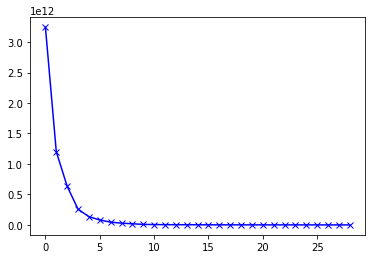

In [137]:
plt.plot(cost, 'bx-')

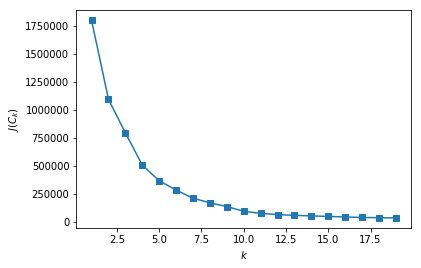

In [138]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

We see that  J(Ck)  decreases significantly until the number of clusters is 5 and then does not change as much anymore. This means that the optimal number of clusters is 5.

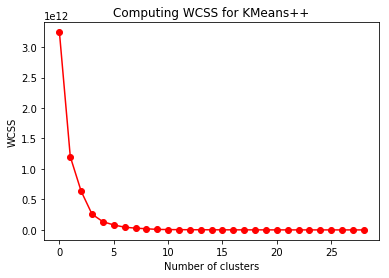

In [139]:
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( X )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( X )
/# As it's difficult to visualise clusters when the data is high-dimensional - we'll see
/# if Seaborn's pairplot can help us see how the clusters are separating out the samples.   
import seaborn as sns
data["cluster"] = y_pred
cols = list(data.columns)

sns.pairplot( data[ cols ], hue="cluster")

In [157]:
kmean= KMeans(4)
kmean.fit(X)
labels=kmean.labels_

In [141]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,S1,S2,S3,hQ1ra,hQ1rb,hQ1rd,hQ1re,hQ1rf,hQ1rh,hQ1ri,...,D7_5,D7_6,D8_Decline to answer,D8_Home maker/Stay at home parent,D8_Not currently employed,"D8_Not currently employed, but looking for work",D8_Retired,D8_Work full time,D8_Work part time,cluster
0,0.0,1.0,52.0,0.0,0.0,-1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,30.0,-1.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,0.0,1.0,21.0,0.0,0.0,-1.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [142]:
clusters.groupby('BMI_group').size()

BMI_group
0.0     48
1.0    308
2.0    308
3.0    318
dtype: int64

In [143]:
clusters.groupby('cluster').size()

cluster
0.0    334
1.0      9
2.0    117
3.0    522
dtype: int64

In [144]:
df_clustering = data[['BMI','S3','S2','points']]

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [146]:
scaler.fit(df_clustering)

C:\Users\SavrinD\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
normalized_df_c = scaler.transform(df_clustering)

C:\Users\SavrinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [148]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(normalized_df_c)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

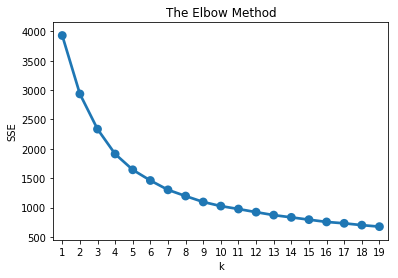

In [149]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [150]:
kmeans4 = KMeans(n_clusters=4, random_state=1)

In [151]:
kmeans4.fit(normalized_df_c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [152]:
#for c in clusters:
#    grid= sns.FacetGrid(clusters, col='cluster')
#    grid.map(plt.hist, c)

Can you have quantitative measurements of people from different
dimensions of healthiness? Which factors explain people attitude towards to be healthier or less healthy, e.g., wealth, time, attitude towards life, …


 How would you profile each segment?

 What can motivate change to improve overall health and wellness by segment?
